In [1]:
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.integrate import quad 
import matplotlib.pyplot as plt

# Question 2

### 1)

In [2]:
X = genfromtxt('job_right_out_of_college_X.csv', delimiter=',')
y = genfromtxt('job_right_out_of_college_y.csv', delimiter=',')

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=0.5)

### 2)

In [3]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)

### 3)

In [4]:
def accuracy_func(predictions, y):
    return np.mean(predictions == y)

# Logistic Regression
def f_prime(w, phi, y, l1_lambda):
    return 1/len(phi) * phi.T @ (sigmoid(phi, w) - y) + (l1_lambda * np.sign(w))

def sigmoid(phi, w):
    return 1/(1 + np.exp(-phi @ w))

def gradient_descent(phi, y, w, eta, num_iterations, l1_lambda):
	for i in range(num_iterations):
		w = w - eta * f_prime(w, phi, y, l1_lambda)  
            
	return w

def log_reg_pred(phi, w):
      return np.where(sigmoid(phi, w) >= 0.5, 1, 0)


def run_lambda_values(w0, X, y, lambdas, eta):
    best_acc = -np.inf  # store initial accuracy as high value
    best_lambda = None
    best_w = w0


    for l1_lambda in lambdas:
        w = gradient_descent(X, y, w0, eta, 10000, l1_lambda)

        predictions = log_reg_pred(X, w)
        acc = accuracy_func(predictions, y)

        if acc > best_acc:  # if new accuracy is better, store value
            best_acc = acc
            best_lambda = l1_lambda
            best_w = w

    return best_w, best_lambda, best_acc

In [5]:
# Logistic Regression
phi = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

w0 = np.zeros(phi.shape[1])
eta = 0.01
lambda_values = np.logspace(-10, 10, 30) 

w, l1_lambda, acc = run_lambda_values(w0, phi, y_train, lambda_values, eta)

print(f"Accuracy: {acc}")
print(f'Weights: {w}')
print(f"Lambda: {l1_lambda}")

Accuracy: 0.915
Weights: [-3.18895519 -0.50376197  0.42557951 -0.78800523  1.34189053 -1.35521108
  3.31672326  1.41741807]
Lambda: 1e-10


In [6]:
# Test accuracy
test_phi = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

test_predictions = log_reg_pred(test_phi, w)
test_acc = accuracy_func(test_predictions, y_test)

print(f'Test Accuracy: {test_acc}')

Test Accuracy: 0.93


### 4)

The Factors Sorted on Importance: Number of Internships, Fitness Level, Being in a Serious Relationship, Graduate in Good Economic Condtion, Having a Large Social Network, College GPA, Height  

Positive Factors Sorted on Importance: Number of Internships, Serious Relationship, Height

### 5)

In [7]:
clf = LogisticRegression(penalty='l1', random_state=0, solver='liblinear').fit(X_train, y_train)
print(f'SKLearn w: {clf.coef_}')

test_predictions = clf.predict(X_test)
test_acc = accuracy_func(test_predictions, y_test)
print(f'SKLearn Test Accuracy: {test_acc}')

SKLearn w: [[ 0.53822511  4.8677956  -0.06579043  7.08853161 -3.10250227 15.40268677
   6.07223662]]
SKLearn Test Accuracy: 0.99


SKLearn Was More Accurate.

The Factors Sorted on Importance (SKLearn): Good Economic Condtion, Large Social Network, Number of Internships, College GPA, Serious Relationship, Fitness Level, Height  
Positive Factors Sorted on Importance (SKLearn): Good Economic Condtion, Large Social Network, Number of Internships, College GPA, Fitness Level

My weights were pretty different than SKLearn. My weights have a Good Eocnomic Condition as a negative impact, where as SKLearn's weights regard it the most signficant positive weight.

# Question 3

In [8]:
def p_m(x):
    return np.where(x>=40000, np.exp(-(x-40000)), 0)

def p_e(x):
    return np.where((x >= 30000) & (x <= 180000), 1/150000, 0)

def p_a(x):
    return (1/(3000*np.sqrt(2*np.pi))) * np.exp(-((x-60000)**2)/(2*(3000)**2))

In [9]:
def entropy_m(x):
        px = max(p_m(x), 1e-10)
        
        return -px * np.log(px)

def entropy_e(x):
        px = p_e(x)
        
        return -px * np.log(px)

def entropy_a(x):
        px = max(p_a(x), 1e-10)
        
        return -px * np.log(px)

### 1)

In [10]:
entropy_m, err = quad(entropy_m, 40000, np.inf)
entropy_e, err = quad(entropy_e, 30000, 180000)

a_min = 60000 - 4 * 3000
a_max = 60000 + 4 * 3000
entropy_a, err = quad(entropy_a, a_min, a_max)

print(f'Max Entropy (Python Integration): {entropy_m}')
print(f'Ella Entropy (Python Integration): {entropy_e}')
print(f'Anushka Entropy (Python Integration): {entropy_a}')

Max Entropy (Python Integration): 0.9999999425376033
Ella Entropy (Python Integration): 11.918390573078392
Anushka Entropy (Python Integration): 9.424173757654117


### 2)

In [11]:
def sampling_entropy(x, p):
    px = p(x)

    return -np.log(px)

In [12]:
# Max
# exponential distribution
samples = np.random.exponential(scale=1, size=10000) + 40000  # distribution with mean of 1 and moved 40000 to the right

entropy_m_sampling = np.mean(sampling_entropy(samples, p_m))
print(f'Max Entropy (Sampling): {entropy_m_sampling}')

Max Entropy (Sampling): 1.004373852956468


In [13]:
# Ella
# Uniform distribution
samples = np.random.uniform(30000, 180000, 10000)

entropy_e_sampling = np.mean(sampling_entropy(samples, p_e))
print(f'Ella Entropy (Sampling): {entropy_e_sampling}')

Ella Entropy (Sampling): 11.918390573078398


In [14]:
# Anuskha
# Gaussian distribution
samples = np.random.normal(loc=60000, scale=3000, size=10000)


entropy_a_sampling = np.mean(sampling_entropy(samples, p_a))
print(f'Anushka Entropy (Sampling): {entropy_a_sampling}')

Anushka Entropy (Sampling): 9.417107186300582


# Question 4

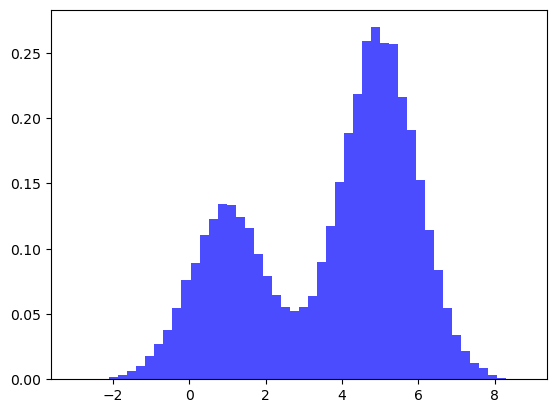

In [2]:
X = genfromtxt('hours_slept.csv', delimiter=',')
Y = genfromtxt('how_much_is_remembered.csv', delimiter=',')

plt.hist(X, 50, facecolor='blue', alpha=0.7, density=True)
plt.show()

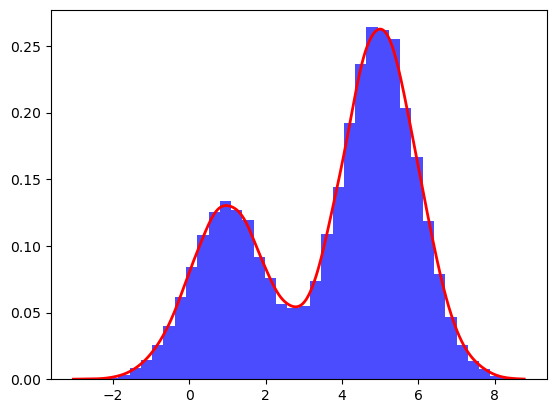

In [4]:
from scipy.stats import gaussian_kde

kde_x = gaussian_kde(X)

def p(x):
    return kde_x(x)

x = np.linspace(min(X), max(X), 1000)
y = p(x)

plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
plt.plot(x, y, color='red', linewidth=2)
plt.show()

### 1)

In [47]:
# Use KDE for the data
# from scipy.stats import norm

# sd = 0.5
# def kde_x(x, X):
#     x = np.atleast_1d(x)
#     pdf = np.sum(norm.pdf(x[:, None], X, sd), axis=1)

#     pdf = pdf/len(X)
#     return pdf

# def p(x):
#     y = kde_x(x, X)
#     return y

# x = np.linspace(min(X), max(X), 1000)
# y = p(x)

# plt.hist(X, 40, facecolor='blue', alpha=0.7, density=True)
# plt.plot(x, y, color='red', linewidth=2)
# plt.show()


In [26]:
np.random.choice(X, 50, replace=False)

array([3.01, 5.7 , 5.81, 4.2 , 3.84, 5.62, 0.8 , 5.72, 5.26, 4.63, 0.9 ,
       4.95, 1.75, 5.27, 5.17, 5.63, 4.54, 3.82, 5.11, 5.88, 5.27, 2.24,
       3.99, 1.66, 1.61, 3.16, 5.52, 4.88, 6.39, 5.95, 5.78, 2.18, 3.01,
       1.31, 3.01, 2.55, 1.4 , 2.85, 1.  , 4.86, 5.43, 3.7 , 8.  , 5.58,
       5.63, 1.45, 1.17, 5.11, 2.66, 6.  ])

### 2)

In [27]:
def KL_divergence(x, p2): 
    p_1 = p(x)
    p_2 = p2(x)

    return p_1*np.log(p_1/p_2)

def KL_divergence_sample(x, q): 
    p_1 = p(x)
    p_2 = q(x)

    return np.mean(np.log(p_1/p_2))


dist_distance_list = []
samples_len_list = []
prev_kl = np.inf

samples_len = np.arange(50, 100000, 50)
for num_samples in samples_len:
    samples_indices = np.random.choice(X.shape[0], num_samples, replace=False)
    samples_x = X[samples_indices]

    kde_samples = gaussian_kde(samples_x)
    def q(x):
        return kde_samples(x)
    
    # x_min, x_max = np.percentile(samples, [1, 99]) 
    integration_kl, error = quad(KL_divergence, min(samples_x), max(samples_x), args=(q,))

    sampling_kl = KL_divergence_sample(samples_x, q)
    print(f'{num_samples} Samples | Sample KL Divergence: {sampling_kl:.5f} | Integration KL Divergence: {integration_kl:.5f}')

    dist_distance_list.append(sampling_kl)
    samples_len_list.append(num_samples)

    if abs(prev_kl - sampling_kl) < 0.0005:
        training_samples_x = samples_x
        training_samples_y = Y[samples_indices]
        break
    else:
        prev_kl = sampling_kl

50 Samples | Sample KL Divergence: 0.06803 | Integration KL Divergence: 0.04852
100 Samples | Sample KL Divergence: 0.05379 | Integration KL Divergence: 0.06441
150 Samples | Sample KL Divergence: 0.02523 | Integration KL Divergence: 0.03035
200 Samples | Sample KL Divergence: 0.03065 | Integration KL Divergence: 0.02736
250 Samples | Sample KL Divergence: 0.01614 | Integration KL Divergence: 0.01676
300 Samples | Sample KL Divergence: 0.01357 | Integration KL Divergence: 0.03685
350 Samples | Sample KL Divergence: 0.01787 | Integration KL Divergence: 0.02665
400 Samples | Sample KL Divergence: 0.01262 | Integration KL Divergence: 0.02859
450 Samples | Sample KL Divergence: 0.00869 | Integration KL Divergence: 0.02294
500 Samples | Sample KL Divergence: 0.01243 | Integration KL Divergence: 0.01488
550 Samples | Sample KL Divergence: 0.00745 | Integration KL Divergence: 0.01414
600 Samples | Sample KL Divergence: 0.00946 | Integration KL Divergence: 0.01537
650 Samples | Sample KL Diver

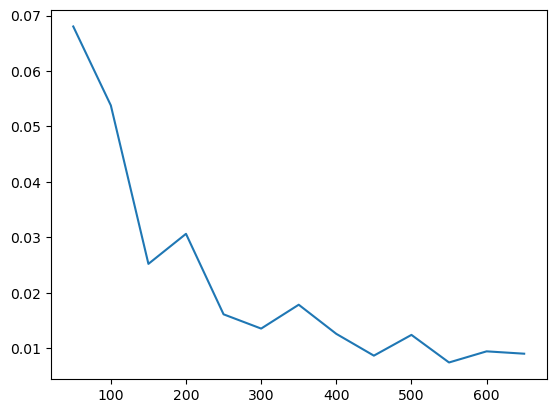

In [28]:
# Plot out decrease of KL Divergence
plt.plot(samples_len_list, dist_distance_list)
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def mse_func(phi, w, y):
    return np.mean((phi.dot(w) - y)**2)

# train regression on samples
training_samples_x = training_samples_x.reshape(-1, 1)
reg = LinearRegression().fit(training_samples_x, training_samples_y)

w = np.hstack((reg.coef_, reg.intercept_))  # get weights

X = X.reshape(-1, 1)
phi = np.hstack((X, np.ones((len(X), 1))))

mse = mse_func(phi, w, Y)
print(f'MSE using sample set {mse}')
print(f'N Sub: {len(training_samples_x)}')
print(f'Percentage of Total: {len(training_samples_x)/len(X)}')

MSE using sample set 0.007524609795241198
N Sub: 650
Percentage of Total: 0.0065
